In [1]:
"""It provides training insights using the history, and weight statistics generated during training.
"""
#Commandline arguments
from argparse import ArgumentParser

#Logging
import logging

#Load/Save objects from/to the disk
from pickle import load as pickle_load

#Plotting
from matplotlib import pyplot as plt


In [20]:
base_model, analysis_type, log_to_console = "inceptionv3", "history", False

#Initialize logging
logger = logging.getLogger(__name__)

#History file
history_file = base_model + ".history"

logger.info(
        'Running with parameters base_model: %s analysis_type: %s log_to_console: %s',
        base_model,
        analysis_type,
        log_to_console)

#Placeholder objects
training_history = None

with open(history_file, 'rb') as handle:
    training_history = pickle_load(handle)

logger.info("Loaded history object: %s", history_file)




In [57]:

class History:
    """Support to analyze the training history to gain better insight.
    """

    _acc_cols = set(['acc', 'val_acc'])
    _loss_cols = set(['loss', 'val_loss'])

    def __init__(self, history):
        #History object must exist to plot accuracy.
        if history is None:
            raise ValueError("History object must exist.")

        self._history = history.history
        
    def accuracy(self, acc_cols = None):
        """It pulls the accuracy metrics for the input columns.
        
        Keyword Arguments:
            cols {[string]} -- It is a list of column names. (default: {None})
        
        Raises:
            ValueError -- It raises a ValueError for invalid column names.
        
        Returns:
            ([], []) -- A tuple of metrics values and their names.
        """
        if acc_cols is None:
            acc_cols = self._acc_cols
        else:
            acc_cols = set(acc_cols)

        #Validate the input metrics set
        if not set(acc_cols).issubset(self._acc_cols):
            raise ValueError(
                    "acc_cols: {} must contain valid values. Allowed values are: {}".format(
                            acc_cols,
                            self._acc_cols))

        return {col:self._history[col] for col in acc_cols}

    def loss(self, loss_cols = None):
        """It pulls the loss metrics for the input columns.
        
        Keyword Arguments:
            cols {[string]} -- It is a list of column names. (default: {None})
        
        Raises:
            ValueError -- It raises a ValueError for invalid column names.
        
        Returns:
            ([], []) -- A tuple of metrics values and their names.
        """
        if loss_cols is None:
            loss_cols = self._loss_cols
        else:
            loss_cols = set(loss_cols)

        #Validate the input metrics set
        if not set(loss_cols).issubset(self._loss_cols):
            raise ValueError(
                    "loss_cols: {} must contain valid values. Allowed values are: {}".format(
                            loss_cols,
                            self._loss_cols))
        return {col:self._history[col] for col in loss_cols}

In [58]:
history = History(training_history)

In [59]:
losses = history.loss()

loss
val_loss


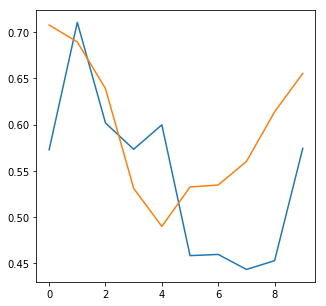

In [92]:
figure, axes = plt.subplots(figsize = (5, 5))

for key, value in losses.items():
    print(key)
    axes.plot(value, label = key)